In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset/Income1.csv')

In [3]:
data

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634
5,6,12.086957,26.398951
6,7,12.488294,17.435307
7,8,12.889632,25.507885
8,9,13.290970,36.884595
9,10,13.732441,39.666109


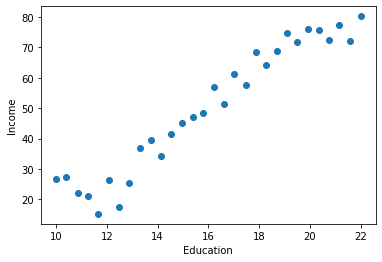

In [5]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

In [6]:
from torch import nn

step1. 数据预处理

In [19]:
x_values = data.Education.values.reshape(-1,1).astype(np.float32) #将x_values reshape成30个长度为1的数组
y_values = data.Income.values.reshape(-1,1).astype(np.float32)

In [20]:
X = torch.from_numpy(x_values) #x_values转化成输入所需的数据类型：tensor
Y = torch.from_numpy(y_values) 

step2.创建模型

In [21]:
model = nn.Linear(1,1) # output = W * input + b, Linear中的两个参数是(x的维数，y的维数)

In [22]:
loss_function = nn.MSELoss() #损失函数

In [23]:
opt = torch.optim.SGD(model.parameters(), lr=0.0001) #梯度下降算法优化

step3.训练模型

In [25]:
for epoch in range(5000):
    for x,y in zip(X,Y):
        y_prediction = model(x)         #使用模型预测
        loss = loss_function(y, y_prediction) #根据预测结果计算损失
        opt.zero_grad()                 #变量梯度清0
        loss.backward()                 #求解梯度
        opt.step()                      #优化模型参数

In [26]:
model.weight

Parameter containing:
tensor([[4.9815]], requires_grad=True)

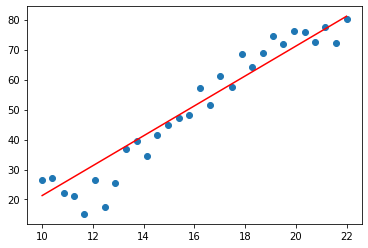

In [27]:
plt.scatter(data.Education, data.Income)
plt.plot(X.numpy(), model(X).data.numpy(), c='red')